In [2]:
import math
import matplotlib.pyplot as plt
from matplotlib import mlab
import numpy as np

Найдем решение НДУ с начальными условиями $y(0) = 0, y'(0) = 0$, используем метод Рунге-Кутта 4-го порядка. 
Далее перейдем к системе ДУ заменой $y_0 = y, y_1 = y'$. В конечном итоге НДУ примет вид:
$$\begin{cases} y_0' = y_1\\
y_1' = xe^{-x} -(10+x^2)y_0\end{cases}$$

In [3]:
def f(x, y): # Функция вычисления вектор-функции, равной правой части
    a = y[1]
    b = x*math.exp(-x)-(10+x**2)*y[0]
    return [a, b]

def k1(x, y): # Функции, вычисляющие вектор-коэффициенты k_i
    a = f(x, y)
    return [a[0]*h, a[1]*h]

def k2(x, y):
    x_i = x + h/2
    a = k1(x, y)
    b = [a[0]/2, a[1]/2]
    b = [y[0]+b[0], y[1]+b[1]]
    c = f(x_i, b)
    return [c[0]*h, c[1]*h]

def k3(x, y):
    x_i = x + h/2
    a = k2(x, y)
    b = [a[0]/2, a[1]/2]
    b = [y[0]+b[0], y[1]+b[1]]
    c = f(x_i, b)
    return [c[0]*h, c[1]*h]

def k4(x, y):
    x_i = x + h
    b = k3(x, y)
    b = [y[0]+b[0], y[1]+b[1]]
    c = f(x_i, b)
    return [c[0]*h, c[1]*h]

def y_new(x, y):# Делаем шаг в методе Рунге-Кутта
    a = k1(x, y)
    b = k2(x, y)
    b = [b[0]*2, b[1]*2]
    c = k3(x, y)
    c = [c[0]*2, c[1]*2]
    d = k4(x, y)
    answer = [a[0]+b[0]+c[0]+d[0], a[1]+b[1]+c[1]+d[1]]
    answer = [answer[0]/6, answer[1]/6]
    answer = [y[0] + answer[0], y[1] + answer[1]]
    return answer

In [4]:
# Число отрезков разбиения
N = 100

# Концы отрезка
x0 = 0
xN = 10

# Шаг сетки
h = (xN - x0)/N

# Массивы решений
y0_NDU = [0 for i in range(N+1)]
y1_NDU = [0 for i in range(N+1)]

# Установка начальных условий для неоднородного решения ОДУ
y0_NDU[0] = 0
y1_NDU[0] = 0
x = [i*h for i in range(N+1)]
for i in range(1, N+1):
    x_i = i*h
    y0_i = y0_NDU[i - 1]
    y1_i = y1_NDU[i - 1]
    [y0_new, y1_new] = y_new(x_i, [y0_i, y1_i])
    y0_NDU[i] = y0_new
    y1_NDU[i] = y1_new

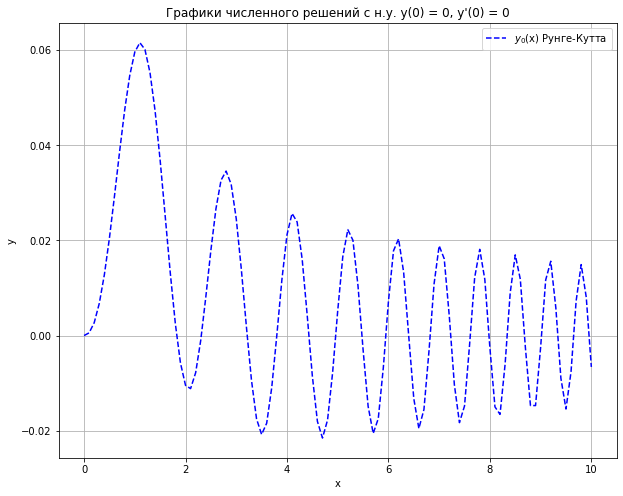

In [5]:
plt.figure(figsize=[10, 8])
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y0_NDU, 'b--', label="$y_0$(x) Рунге-Кутта")
plt.title("Графики численного решений с н.у. y(0) = 0, y'(0) = 0")
plt.legend()
plt.grid()
plt.show()

Теперь ищем решение ОДУ с начальными условиями $y(0) = 1, y'(0) = 0$ и  $y(0) = 0, y'(0) = 1$.

In [6]:
def f_1(x, y): # Функция вычисления вектор-функции правой части
    a = y[1]
    b = -(10+x**2)*y[0]
    return [a, b]
def k1_1(x, y): # Функции вычисления вектор-коэффициентов k_i
    a = f_1(x, y)
    return [a[0]*h, a[1]*h]
def k2_1(x, y):
    x_i = x + h/2
    a = k1_1(x, y)
    b = [a[0]/2, a[1]/2]
    b = [y[0]+b[0], y[1]+b[1]]
    c = f_1(x_i, b)
    return [c[0]*h, c[1]*h]
def k3_1(x, y):
    x_i = x + h/2
    a = k2_1(x, y)
    b = [a[0]/2, a[1]/2]
    b = [y[0]+b[0], y[1]+b[1]]
    c = f_1(x_i, b)
    return [c[0]*h, c[1]*h]
def k4_1(x, y):
    x_i = x + h
    b = k3_1(x, y)
    b = [y[0]+b[0], y[1]+b[1]]
    c = f_1(x_i, b)
    return [c[0]*h, c[1]*h]
def y_new1(x, y):#функция, делающая шаг в методе Рунге-Кутта
    a = k1_1(x, y)
    b = k2_1(x, y)
    b = [b[0]*2, b[1]*2]
    c = k3_1(x, y)
    c = [c[0]*2, c[1]*2]
    d = k4_1(x, y)
    answer = [a[0]+b[0]+c[0]+d[0], a[1]+b[1]+c[1]+d[1]]
    answer = [answer[0]/6, answer[1]/6]
    answer = [y[0] + answer[0], y[1] + answer[1]]
    return answer

In [7]:
# Массивы решений
y0_ODU1 = [0 for i in range(N+1)]
y1_ODU1 = [0 for i in range(N+1)]

# Начальные условия для первого решения ОДУ (1, 0)
y0_ODU1[0] = 1
y1_ODU1[0] = 0
x = [i*h for i in range(N+1)]
for i in range(1, N+1):
    x_i = i*h
    y0_i = y0_ODU1[i - 1]
    y1_i = y1_ODU1[i - 1]
    [y0_new, y1_new] = y_new1(x_i, [y0_i, y1_i])
    y0_ODU1[i] = y0_new
    y1_ODU1[i] = y1_new

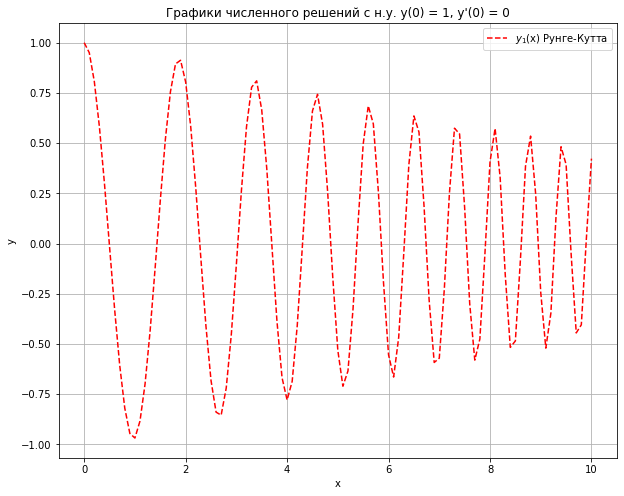

In [8]:
plt.figure(figsize=[10, 8])
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y0_ODU1, 'r--', label="$y_1$(x) Рунге-Кутта")
plt.title("Графики численного решений с н.у. y(0) = 1, y'(0) = 0")
plt.legend()
plt.grid()
plt.show()

In [9]:
# Массивы решений
y0_ODU2 = [0 for i in range(N+1)]
y1_ODU2 = [0 for i in range(N+1)]

# Начальные условия для первого решения ОДУ (1, 0)
y0_ODU2[0] = 0
y1_ODU2[0] = 1
x = [i*h for i in range(N+1)]
for i in range(1, N+1):
    x_i = i*h
    y0_i = y0_ODU2[i - 1]
    y1_i = y1_ODU2[i - 1]
    [y0_new, y1_new] = y_new1(x_i, [y0_i, y1_i])
    y0_ODU2[i] = y0_new
    y1_ODU2[i] = y1_new

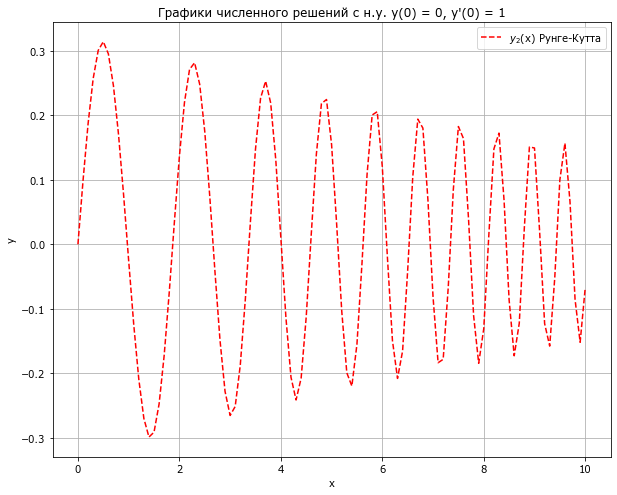

In [10]:
plt.figure(figsize=[10, 8])
plt.rc('font',**{'family':'verdana'})
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y0_ODU2, 'r--', label="$y_2$(x) Рунге-Кутта")
plt.title("Графики численного решений с н.у. y(0) = 0, y'(0) = 1")
plt.legend()
plt.grid()
plt.show()

Общее решение будет иметь вид $y(x) = C_1 y_1(x) + C_2y_2(x) + y_0(x),$ где $y_1, y_2$ - решения ОДУ, а $y_0$ - решение НДУ.

In [13]:
C_1 = -3
C_2 = 4
y = list(map(lambda x: C_1*x[0] + C_2*x[1], zip(y0_ODU1, y0_ODU2)))
y = list(map(lambda x: x[0] + x[1], zip(y, y0_NDU)))

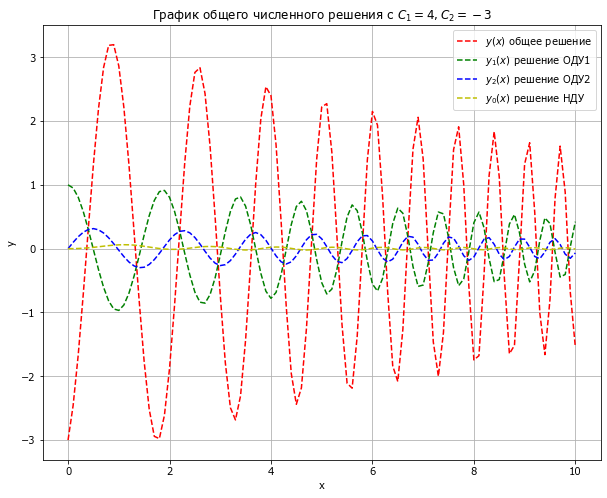

In [14]:
plt.figure(figsize=[10, 8])
plt.rc('font',**{'family':'verdana'})
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, 'r--', label="$y(x)$ общее решение")
plt.plot(x, y0_ODU1, 'g--', label="$y_1(x)$ решение ОДУ1")
plt.plot(x, y0_ODU2, 'b--', label="$y_2(x)$ решение ОДУ2")
plt.plot(x, y0_NDU, 'y--', label="$y_0(x)$ решение НДУ")
plt.title("График общего численного решения с $C_1 = 4, C_2 = -3$")
plt.legend()
plt.grid()
plt.show()